# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





# Solving the Diffusion Equation

This presents an algorithm for directly solving a diffusion equation.

 * The first algorithm solves for the distribution of walkers as we did in class:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

where $u(x,t)$ is the density of walkers at position $x$ and time $t$, and $D$ is the diffusion constant.

 * The second solves a boundary value problem, analogous to  the [Cook my meat](http://up.csail.mit.edu/science-of-cooking/) app that we discussed in class.



In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

import scipy
import scipy.integrate


In [91]:
class DiffusionPDE:

    def __init__(self, L=20, dx=.1, u_left=0, u_right=0):

        self.L = L # total length of the space
        self.dx = dx # space step

        # total number of space points
        self.n_space_dx = int(L/dx)

        c=1/self.dx**2 #spatial scale
        
        # Define the discretization of the second derivative
        self.kernel = np.array([1.,-2.,1.]) * c

        # Boundary conditions
        # we assume that the total space is much larger than the scale 
        self.u_left = u_left # left boundary value
        self.u_right = u_right # right boundary value


    def deriv(self, u, t):
        """Returns the time derivative of our PDE

        Args:
            u: A numpy array containing the current densities
            t: The current time

        Returns:
            A numpy array containing the derivatives
        """

        # Add boundary values at the ends
        u_padded = np.concatenate([[self.u_left],u,[self.u_right]])

        # Compute the right-hand side
        # look up what np.correlate does!!
        rhs = np.correlate(u_padded, self.kernel, mode='valid')

        return rhs
    

    def solve(self, tmax=10, dt=.1, u0=None):

        # discretize space
        width = self.L/2
        x = np.linspace(-width, width, self.n_space_dx)

        # if no initial condition is given, use a Gaussian
        if u0 is None:
            u0 = np.exp(-x**2)
        else:
            # check u0 is the right size
            assert len(u0) == len(x)

            #check that there are no NaNs or negative values
            assert not np.isnan(u0).any()
            assert not (u0 < 0).any()


        # discretize time
        t = np.arange(0, tmax, dt)

        # solve the PDE
        u = scipy.integrate.odeint(self.deriv, u0, t)
        
        return t, x, u

# Basic solution from initial profile

In [105]:
sys = DiffusionPDE(L=20, dx=.1)


tmax = 10

t, x, ut = sys.solve(tmax=tmax, dt=.1)


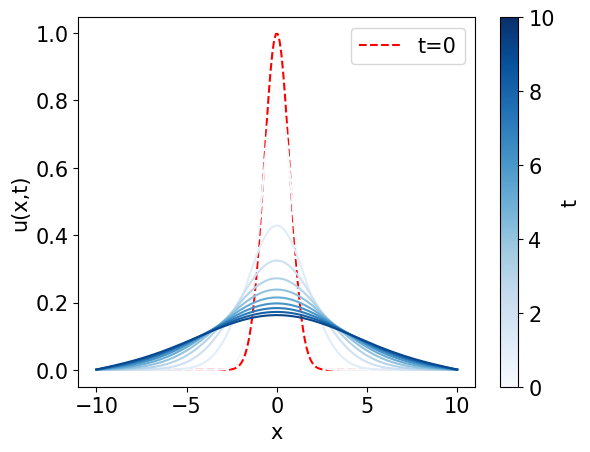

In [106]:
fig, ax = plt.subplots()

#plot initial condition in red
ax.plot(x,ut[0,:],'r--', label='t=0')

#plot the solution every 10 time steps
cmap = plt.get_cmap('Blues')
for i in range(1,ut.shape[0],10):
    ax.plot(x,ut[i,:],color=cmap(i/ut.shape[0]))

plt.xlabel('x')
plt.ylabel('u(x,t)')

#colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
sm.set_array([])
plt.colorbar(sm, label='t', ax=ax)

ax.legend()
plt.show()

In [112]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

## Diffusion constant

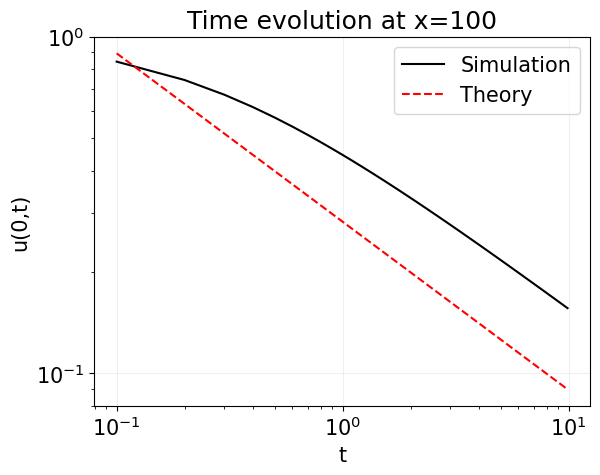

In [115]:
#plot time change at fixed x

x_plot = 100

plt.plot(t[1:], ut[1:,x_plot], 'k', label='Simulation')

plt.plot(t[1:],1/(np.sqrt(t[1:])*np.sqrt(4*np.pi)), 'r--', label='Theory')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('t')
plt.ylabel('u(0,t)')
plt.title(f'Time evolution at x={x_plot}')

plt.legend()

plt.grid(alpha=.2)

plt.show()


# Boundary value problems - Cooking

In [95]:
L = 40
dx = .1

tmax = 200

sys = DiffusionPDE(L=L, dx=dx, u_left=150, u_right=150)


u0=np.ones(int(L/dx))*23

t,x,ut=sys.solve(tmax=tmax, dt=1., u0=u0)


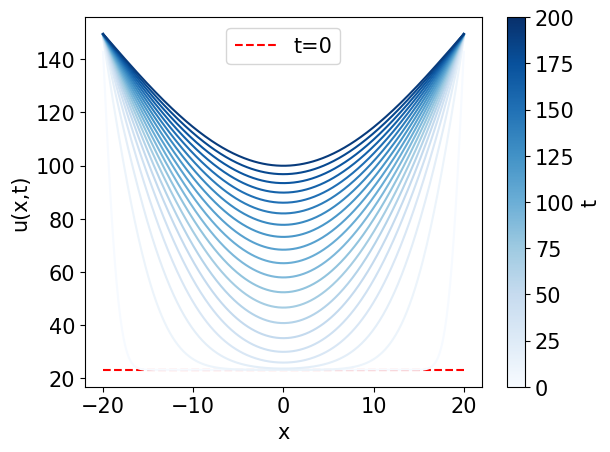

In [96]:
fig, ax = plt.subplots()

#plot initial condition in red
ax.plot(x,ut[0,:],'r--', label='t=0')

#plot the solution
cmap = plt.get_cmap('Blues')

for i in range(1,ut.shape[0],10):
    ax.plot(x,ut[i,:],color=cmap(i/ut.shape[0]))

plt.xlabel('x')
plt.ylabel('u(x,t)')

#colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
sm.set_array([])
plt.colorbar(sm, label='t', ax=ax)

ax.legend()
plt.show()